In [4]:
import keras 
from keras.layers import *
from keras.models import *
from keras.losses import *
from keras.datasets import fashion_mnist
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [5]:
win_len=32
look_back=11
out_dim=1
batch_size = 768  # Batch size for training.
epochs = 1  # Number of epochs to train for.
latent_dim = 256  

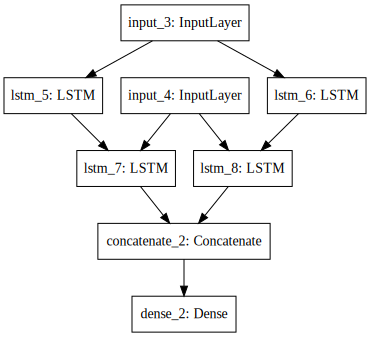

In [8]:
encoder_inputs = Input(shape=(None,look_back))
encoder_f = LSTM(latent_dim, return_state=True)
encoder_r = LSTM(latent_dim, return_state=True,go_backwards=True)
encoder_outputsf, state_hf, state_cf = encoder_f(encoder_inputs)
encoder_outputsr, state_hr, state_cr = encoder_r(encoder_inputs)
encoder_states_f = [state_hf, state_cf]
encoder_states_r = [state_hr, state_cr]
decoder_inputs = Input(shape=(None, out_dim))
decoder_lstm_f = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_lstm_r = LSTM(latent_dim, return_sequences=True, return_state=True,go_backwards=True)
decoder_outputs_f, _, _ = decoder_lstm_f(decoder_inputs,initial_state=encoder_states_f)
decoder_outputs_r, _, _ = decoder_lstm_r(decoder_inputs,initial_state=encoder_states_r)
decoder_outputs = keras.layers.concatenate([decoder_outputs_f, decoder_outputs_r], axis=-1)
decoder_dense = Dense(out_dim, activation='linear')
decoder_outputs = decoder_dense(decoder_outputs)
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='mse')
SVG(model_to_dot(model).create(prog='dot', format='svg'))